In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
from keras.datasets import cifar10
from keras.src.utils import to_categorical
import matplotlib.pyplot as plt

seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
# use to_categorical directly instead of np_utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Initialize the model
model = Sequential()

# 1st Convolutional Layer (32 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Adjust input shape for your data (e.g. 64x64 RGB image)

# Dropout (20%)
model.add(Dropout(0.2))

# 2nd Convolutional Layer (32 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu'))

# Max Pooling Layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer (64 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Dropout (20%)
model.add(Dropout(0.2))

# 4th Convolutional Layer (64 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling Layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th Convolutional Layer (128 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(128, (3, 3), activation='relu'))

# Dropout (20%)
model.add(Dropout(0.2))

# 6th Convolutional Layer (128 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(128, (3, 3), activation='relu'))

# Max Pooling Layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dropout (20%)
model.add(Dropout(0.2))

# Fully Connected Layer (1024 units, ReLU activation)
model.add(Dense(1024, activation='relu'))

# Dropout (20%)
model.add(Dropout(0.2))

# Fully Connected Layer (512 units, ReLU activation)
model.add(Dense(512, activation='relu'))

# Dropout (20%)
model.add(Dropout(0.2))

# Output Layer (10 units, Softmax activation)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 9, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
from keras.datasets import cifar10
from keras.src.utils import to_categorical
import matplotlib.pyplot as plt

seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
# use to_categorical directly instead of np_utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Initialize the model
model = Sequential()

# 1st Convolutional Layer (32 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Adjust input shape for your data

# Max Pooling Layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer (64 feature maps, 3x3 kernel, ReLU activation)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling Layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Layer (512 units, ReLU activation)
model.add(Dense(512, activation='relu'))

# Dropout (50%)
model.add(Dropout(0.5))

# Output Layer (10 units, Softmax activation)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204,682 (4.60 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

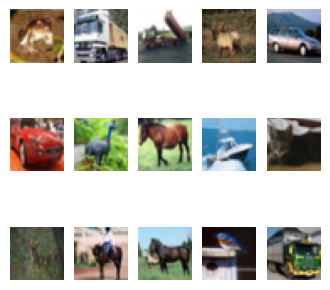

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4,4))
for i in range(15):
  plt.subplot(3,5,1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

In [20]:
import numpy as np
# Predict the first 4 images of the test data
y_predictions = model.predict(X_test[:4])

#y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

print("Predicted labels:", y_predictions)
print("Actual labels:   ", actual_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted labels: [7 9 7 9]
Actual labels:    [3 8 8 0]


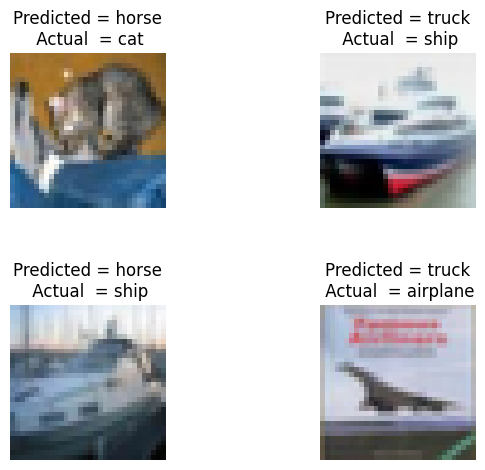

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (6,6))
axes = axes.ravel() #

for i in np.arange(0, 4):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[actual_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.5261 - loss: 1.3181 - val_accuracy: 0.6156 - val_loss: 1.0850
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.6253 - loss: 1.0620 - val_accuracy: 0.6700 - val_loss: 0.9497


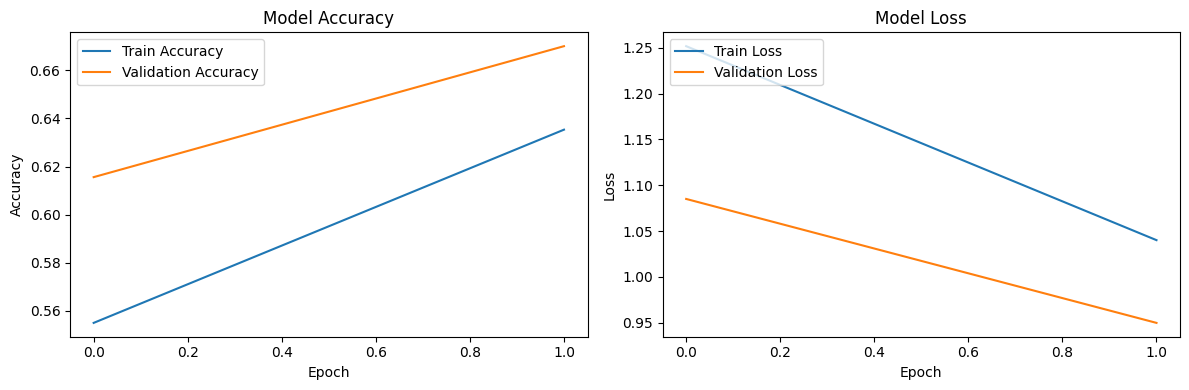

In [26]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned from model.fit()
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()
